In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
import os
os.environ["KERAS_BACKEND"] = "torch"

In [12]:
import keras
from keras import Sequential # sequential model: https://keras.io/guides/sequential_model/
from keras.layers import Dense, Dropout

Read the data

In [13]:
df1 = pd.read_csv("FINAL1.csv")
df2 = pd.read_csv("FINAL2.csv")

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16992 entries, 0 to 16991
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datetime                  16992 non-null  object 
 1   hour                      16992 non-null  int64  
 2   weekday                   16992 non-null  int64  
 3   dayOfMonth                16992 non-null  int64  
 4   month                     16992 non-null  int64  
 5   year                      16992 non-null  int64  
 6   total number of sessions  16992 non-null  int64  
 7   total minutes of parking  16992 non-null  float64
 8   temperature               16992 non-null  float64
 9   cloud_cover               16992 non-null  float64
 10  pressure                  16992 non-null  float64
 11  windspeed                 16992 non-null  float64
 12  precipitation             16992 non-null  float64
dtypes: float64(6), int64(6), object(1)
memory usage: 1.7+ MB


Since we dont need datetime for the predictionand dont know the total number of sessions, we remove the columns

In [15]:
df1 = df1.drop("datetime", axis=1)
df2 = df2.drop("datetime", axis=1)
df1 = df1.drop("total number of sessions", axis=1)
df2 = df2.drop("total number of sessions", axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16992 entries, 0 to 16991
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hour                      16992 non-null  int64  
 1   weekday                   16992 non-null  int64  
 2   dayOfMonth                16992 non-null  int64  
 3   month                     16992 non-null  int64  
 4   year                      16992 non-null  int64  
 5   total minutes of parking  16992 non-null  float64
 6   temperature               16992 non-null  float64
 7   cloud_cover               16992 non-null  float64
 8   pressure                  16992 non-null  float64
 9   windspeed                 16992 non-null  float64
 10  precipitation             16992 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 1.4 MB


Extracting the feature we want to predict and then we split into train, validation and test set. For now only one for transparency reasons

In [16]:
# define x and Y
y = df1["total minutes of parking"]
y = pd.DataFrame(y)
X = df1.drop("total minutes of parking", axis=1)

Split the data into training, holdout and test set.

In [17]:
# Conduct train test split
from sklearn.model_selection import train_test_split

X_train, predictors_test, y_train, target_test = train_test_split(X, y, test_size=0.3, random_state=42)

# now split X_train to achive 50-20-30 split
predictors_train, predictors_hold, target_train, target_hold = train_test_split(X_train, y_train, test_size=(0.2/0.7),random_state=34)

predictors_train, traget_train = 50% = training set

predictors_hold, target_hold   = 20% = holdout set

predictors_test, target_test   = 30% = test set

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(predictors_train)

#scale training set
predictors_train = scaler.transform(predictors_train)

#scale holdout set
predictors_hold = scaler.transform(predictors_hold)

#scale test set
predictors_test = scaler.transform(predictors_test)

Now we build the sequential NN.

In [34]:
neuralnetwork = Sequential(
    [Dense(36, activation="relu", input_shape=(10,)),
    Dense(36, activation="relu"),
     Dense(1)])

Comile the model. 

In [35]:
neuralnetwork.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [36]:
neuralnetwork.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 36)             │           396 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 36)             │         1,332 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            37 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,765 (6.89 KB)

 Trainable params: 1,765 (6.89 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = neuralnetwork.fit(predictors_train, target_train, epochs=20, validation_split=0.2)

Epoch 1/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1627782.3750 - mae: 645.7691 - mse: 1627782.3750 - val_loss: 1570047.8750 - val_mae: 649.1326 - val_mse: 1570047.8750
Epoch 2/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1481519.6250 - mae: 656.4870 - mse: 1481519.6250 - val_loss: 1018602.5000 - val_mae: 646.9993 - val_mse: 1018602.5000
Epoch 3/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 863723.0000 - mae: 628.0476 - mse: 863723.0000 - val_loss: 776303.6250 - val_mae: 654.7770 - val_mse: 776303.6250
Epoch 4/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 738611.7500 - mae: 639.5164 - mse: 738611.7500 - val_loss: 735063.6875 - val_mae: 636.5873 - val_mse: 735063.6875
Epoch 5/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 717246.0000 - mae: 623.9049 - mse: 717246.0000 - val_loss: 713753.7500 - val_mae: 616.2046 - val_mse: 713753.7500
Epoch 6/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 691525.5625 - mae: 603.9062 - mse: 691525.5625 - val_loss: 698

In [42]:
neuralnetwork.predict(predictors_train)

266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 570.4525  ],
       [1930.1984  ],
       [ 590.21716 ],
       ...,
       [ 208.78383 ],
       [  14.515973],
       [ 274.8358  ]], dtype=float32)

In [44]:
history_df = pd.DataFrame(history.history)
history_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,1.634208e+06,655.688354,1.634208e+06,1.570048e+06,649.132568,1.570048e+06
1,1.297539e+06,638.628479,1.297539e+06,1.018602e+06,646.999268,1.018602e+06
2,8.333932e+05,647.559082,8.333932e+05,7.763036e+05,654.776978,7.763036e+05
3,7.346057e+05,639.413330,7.346057e+05,7.350637e+05,636.587341,7.350637e+05
4,7.087552e+05,619.421265,7.087552e+05,7.137538e+05,616.204590,7.137538e+05
5,6.921939e+05,602.212219,6.921939e+05,6.984402e+05,602.743469,6.984402e+05
6,6.805506e+05,588.665710,6.805506e+05,6.875139e+05,590.779236,6.875139e+05
7,6.708025e+05,577.178467,6.708025e+05,6.790361e+05,579.741028,6.790361e+05
8,6.630546e+05,566.321716,6.630546e+05,6.715231e+05,570.757629,6.715231e+05
9,6.568435e+05,558.306641,6.568435e+05,6.657301e+05,562.857605,6.657301e+05


In [45]:
root_metrics_df = history_df[["mse", "val_mse"]].apply(np.sqrt)
root_metrics_df.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
root_metrics_df

,rmse,val_rmse
0,1278.361500,1253.015513
1,1139.095749,1009.258391
2,912.903746,881.080941
3,857.091411,857.358552
4,841.875993,844.839482
5,831.981933,835.727378
6,824.954885,829.164602
7,819.025335,824.036445
8,814.281624,819.465146
9,810.458821,815.922829


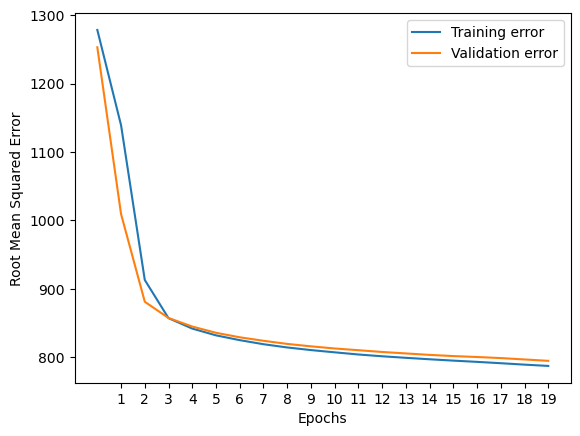

In [46]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(root_metrics_df["rmse"], label = 'Training error')
plt.plot(root_metrics_df["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
plt.xticks(range(1,20))
plt.legend()

plt.show()

ToDO

Rescale the data

perform feature selection (based on the impact of each feature)

split data into train/validation/test sets

throw the training data into the NN and see how it performs

adapt hyperparameters

evaluate model